<a href="https://colab.research.google.com/github/ft10101/AI-ML/blob/main/Day2_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import os #for excessing system files
import pandas as pd #for using datastructure called dataframe 
import numpy as np #for numeric data
import matplotlib.pyplot as mat #for visualisation
#importing some important libraries as per our usage
%matplotlib inline
#saves all the generated images within notebook

In [158]:
dataframe = pd.read_csv('/content/ex1data1.txt',header = None, names = ['Population','Profit'])
#uploading the dataset and saving it in datafreame variable and set column names as 'Population','Profit'
dataframe.head()
#display first 5 rows

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [159]:
dataframe #actual dataframe

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [160]:
dataframe.describe()
# describe() gives min, max,count, std, etc.

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [161]:
dataframe.T   #to transpose the dataframe

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
Population,6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,...,6.00200,5.5204,5.0594,5.7077,7.6366,5.8707,5.3054,8.29340,13.3940,5.43690
Profit,17.5920,9.1302,13.6620,11.8540,6.8233,11.8860,4.3483,12.0000,6.5987,3.8166,...,0.92695,0.1520,2.8214,1.8451,4.2959,7.2029,1.9869,0.14454,9.0551,0.61705


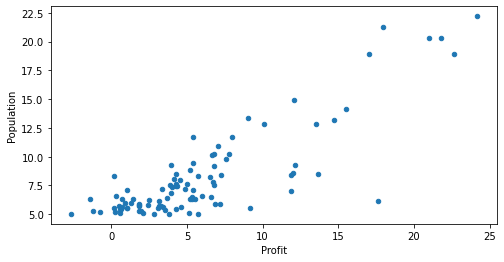

In [162]:
dataframe.plot( kind = 'scatter', x = 'Profit', y = 'Population', figsize = (8,4))
#plotting a scatter graph of profit and population

#Function to compute the cost function

In [163]:
def computecost( X, y, theta):    #function definition
      inner_product = np.power(((X * theta.T) - y), 2) #
      return np.sum(inner_product) / (2 * len(X))


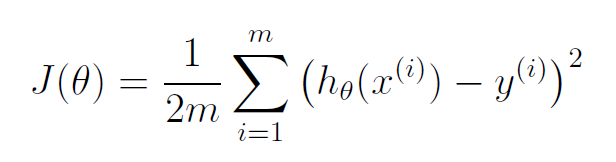



Apending 1's column to the front of our dataframe

In [164]:
dataframe.insert(0,'Ones', 1) 
 #adding a new column names Ones having only 1's

In [165]:
dataframe.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


Set training data (x) and target variable (y)

In [166]:
cols = dataframe.shape[1]   #number of columns
cols

3

In [167]:
X = dataframe.iloc[: , 0:cols-1 ]    #every row and columns from index 0 to last-1
y = dataframe.iloc[: , cols-1:cols]  #every row and columns of index last-1 to last

#Converting dataframe to numpy matrices and creating aparameter (theta) matrix

In [168]:
X = np.matrix( X.values ) 
y = np.matrix( y.values )

In [169]:
theta = np.matrix( np.array([0,0]))   
theta

matrix([[0, 0]])

In [170]:
X.shape,  y.shape,  theta.shape #Dimensions of x, y and theta

((97, 2), (97, 1), (1, 2))

In [171]:
computecost(X, y, theta)  #function call and calculates cost function

32.072733877455676

# Function to perform Gradient Descent on parameters theta by repeatedly updating the parameters

In [172]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)
    for i in range(iters):
        error = (X * theta.T) - y
        
        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        for j in range(parameters):
            term  = np.multiply(error, X[:, j])
            temp[0,j] = theta[0,j] -((alpha / len(X)) * np.sum(term))
          
        theta = temp
        cost[i] = computecost(X, y, theta)
        
    return theta, cost

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [174]:
alpha = 0.01
iterations = 1000
# perform gradient descent to fit the model parameters and compute the cost
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [175]:
print(g)

[[-3.89578082  1.19303364]]


In [176]:
print(cost)

[6.73719046 5.93159357 5.90115471 ... 4.47697138 4.47697138 4.47697138]


In [178]:
computecost(X, y, g)

4.476971375975179

### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

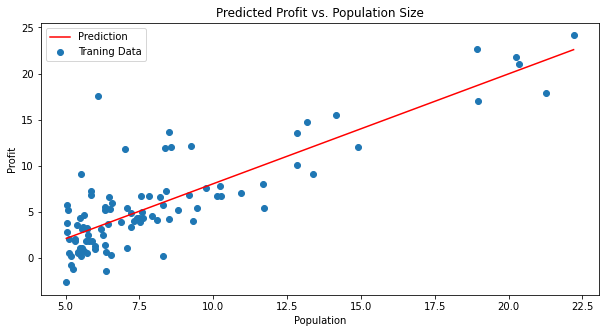

In [182]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(dataframe.Population.min(), dataframe.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = mat.subplots(figsize=(10,5))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(dataframe.Population, dataframe.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')


###  Plotting the graph of the gradient descent function which outputs a vector with the cost at each training iteration.

Text(0.5, 1.0, 'Error vs Training epoch')

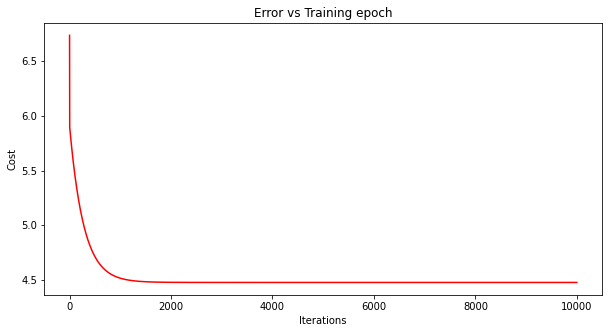

In [184]:
fig, ax = mat.subplots(figsize = (10,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')